In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define Parsing Function

In [2]:
def parse_eyelink_edf_data(filename, start_name = 'TRIAL_START', end_name = 'TRIAL_END'):
    # initialize the sample array
    sample_array = []
    # set parameter to record/drop data
    record_data = False

    with open(filename) as file:
        for line in file:
            split_line = line.split('\t')
            # check if line is a message
            if split_line[0].startswith('MSG'):
                try:
                    # parse message content
                    msg_content = split_line[1].split(' ')
                    # check if trial started
                    if msg_content[1] == start_name:
                        # set trial id
                        trialid = int(msg_content[2].strip('\n'))
                        # start data saving
                        record_data = True
                    # check if trial ended
                    elif msg_content[1] == end_name:
                        endid = int(msg_content[2].strip('\n'))
                        # end data saving
                        record_data = False
                        if trialid != endid:
                            # sanity check
                            raise ValueError(f'Trial Start ID {trialid} does not match trial end id {endid}')         
                except IndexError:
                    pass
            elif split_line[0].startswith('EFIX'):
                pass
            # you could add more conditions here ...
            # a line with data has 6 entries
            elif len(split_line) == 6:
                if record_data:
                    # discard the last entry (...\n)
                    record_line = split_line[:5]
                    # add the trial id
                    record_line.append(trialid)
                    # save the line in new array
                    sample_array.append(record_line)

    # convert to pd Data Frame
    data = pd.DataFrame(sample_array)
    # ensure data format
    for col in range(5):
        data[data[col] == '   .'] = np.nan
        data[col] = data[col].astype(float)
    # name columns
    data.columns = ['sample', 'x_pos', 'y_pos', 'pupil_width', 'unknownB', 'trial']
    data = data.dropna(axis = 0)
    return data

# Apply parsing to test case

In [3]:
filename = 'toni0001.asc'
data = parse_eyelink_edf_data(filename)
data

,sample,x_pos,y_pos,pupil_width,unknownB,trial
0,472988.0,490.8,572.3,7548.0,32768.0,1.0
1,472989.0,491.3,572.3,7548.0,32768.0,1.0
2,472990.0,491.5,569.9,7548.0,32768.0,1.0
3,472991.0,489.0,566.8,7549.0,32768.0,1.0
4,472992.0,489.0,566.8,7549.0,32768.0,1.0
...,...,...,...,...,...,...
203757,734265.0,1940.6,-147.9,6634.0,32768.0,48.0
203758,734266.0,1935.2,-147.2,6634.0,32768.0,48.0
203759,734267.0,1937.6,-127.8,6585.0,32768.0,48.0
203760,734268.0,1937.2,-133.4,6585.0,32768.0,48.0


# remodnav

## prepare dataframe

In [6]:
#save to csv

data.to_csv("toni0001.csv", index=False)

In [7]:
#select x/y position columns, no header, tab separated

df = pd.read_csv('toni0001.csv')
df = df[['x_pos', 'y_pos']]
df.to_csv('toni0001_xypositions.tsv', sep='\t', header=None, encoding=None, index=False)

## save remodnav output as csv

In [23]:
# convert .tsv file to .csv file using with open()

# import re
 
# reading given tsv file
# with open("toni0001_xypositions_events.tsv", 'r') as myfile:  
#  with open("toni0001_xypositions_events.csv", 'w') as csv_file:
#    for line in myfile:
       
      # Replace every tab with comma
#      fileContent = re.sub("\t", ",", line)
       
      # Writing into csv file
#      csv_file.write(fileContent)
 
# output
# print("Successfully made csv file")

In [8]:
# convert .tsv file to .csv file using pandas
 
tsv_file='toni0001_xypositions_events.tsv'
 
# reading given tsv file
csv_table=pd.read_table(tsv_file,sep='\t')
 
# converting tsv file into csv
csv_table.to_csv('toni0001_xypositions_events.csv',index=False)
 
# output
print("Successfully made csv file")

Successfully made csv file


## trial 1 events (remodnav)

In [25]:
trial_1 = data[data["trial"] == 1.0]
trial_1

,sample,x_pos,y_pos,pupil_width,unknownB,trial
0,472988.0,490.8,572.3,7548.0,32768.0,1.0
1,472989.0,491.3,572.3,7548.0,32768.0,1.0
2,472990.0,491.5,569.9,7548.0,32768.0,1.0
3,472991.0,489.0,566.8,7549.0,32768.0,1.0
4,472992.0,489.0,566.8,7549.0,32768.0,1.0
...,...,...,...,...,...,...
6696,479684.0,1135.1,655.7,6071.0,32768.0,1.0
6697,479685.0,1135.1,656.5,6062.0,32768.0,1.0
6698,479686.0,1136.4,657.2,6062.0,32768.0,1.0
6699,479687.0,1136.2,657.2,6071.0,32768.0,1.0


In [26]:
trial_1.to_csv("trial_1.csv", index=False)

In [27]:
df_trial1 = pd.read_csv('trial_1.csv')
df_trial1 = df_trial1[['x_pos', 'y_pos']]
df_trial1.to_csv('trial_1_xypositions.tsv', sep='\t', header=None, encoding=None, index=False)

#remodnav
#WARNING:Computed velocity exceeds threshold. Inappropriate filter setup?

In [28]:
#trial 1 tsv to csv
tsv_file="trial_1_events.tsv"
csv_table=pd.read_table(tsv_file,sep='\t')
csv_table.to_csv('trial_1_events.csv',index=False)
 
# output
print("Successfully made csv file")

Successfully made csv file


## trial 30 events

In [29]:
trial_30 = data[data["trial"] == 30.0]

In [30]:
trial_30.to_csv("trial_30.csv", index=False)

In [31]:
df_trial30 = pd.read_csv('trial_30.csv')
df_trial30 = df_trial30[['x_pos', 'y_pos']]
df_trial30.to_csv('trial_30_xypositions.tsv', sep='\t', header=None, encoding=None, index=False)

#remodnav
#no warning

## trial 15 events

In [32]:
trial_15 = data[data["trial"] == 15.0]

In [50]:
trial_15.to_csv("trial_15.csv", index=False)

In [51]:
df_trial15 = pd.read_csv('trial_15.csv')
df_trial15 = df_trial15[['x_pos', 'y_pos']]
df_trial15.to_csv('trial_15_xypositions.tsv', sep='\t', header=None, encoding=None, index=False)

#remodnav
#no warning

# Visualize the data

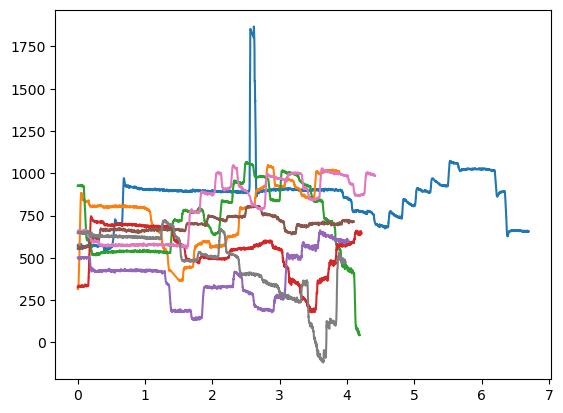

In [9]:
# visualize the x position over time for some selected trials
trials_to_plot = [1.0, 4.0, 8.0, 10.0, 11.0, 13.0, 14.0, 15.0]

for trial in trials_to_plot:
    # make sure each trial starts at 0
    time_line_zeroed = data[data.trial == trial]['sample'] - data[data.trial == trial]['sample'].iloc[0]
    # and divide by 1000 to make it seconds
    time_line_secs = time_line_zeroed/1000

    y_pos = data[data.trial == trial].y_pos
    plt.plot(time_line_secs, y_pos) 

# Align the gaze data to the path

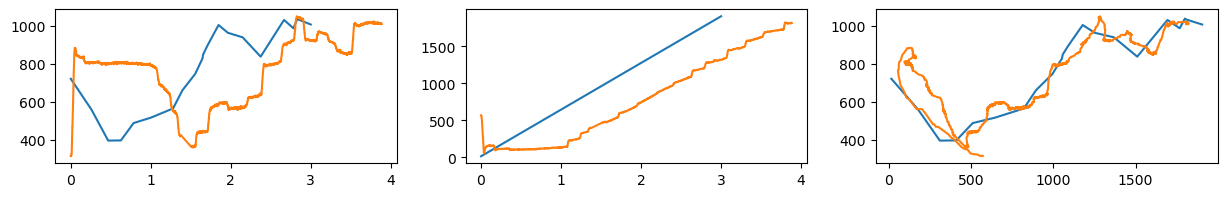

In [33]:
path_info_filename = 'trialinfo_toni.csv'

# load the path data
path_data = pd.read_csv(path_info_filename)
y_pos_cols = path_data.columns[['yVals' in path_data.columns[x] for x in range(len(path_data.columns))]]
x_pos_cols = path_data.columns[['xVals' in path_data.columns[x] for x in range(len(path_data.columns))]]

y_pos_path = path_data[y_pos_cols]
x_pos_path = path_data[x_pos_cols]

trial = 4.0
# filter x and y position by trial
path_y = y_pos_path.loc[path_data['trial_order'] == int(trial), :].values[0]
path_x = x_pos_path.loc[path_data['trial'] == int(trial), :].values[0]

gaze_y = data[data.trial == trial].y_pos
gaze_x = data[data.trial == trial].x_pos

# define a timeline for the path (3 seconds, 360 samlpes)
time_path = np.linspace(0, 3, 360)

# timeline for gaze
time_line_zeroed = data[data.trial == trial]['sample'] - data[data.trial == trial]['sample'].iloc[0]
# and divide by 1000 to make it seconds
time_target = time_line_zeroed/1000

# plot
fig, axs = plt.subplots(1,3, figsize = (15,2))

axs[0].plot(time_path, path_y)
axs[0].plot(time_target, gaze_y)

axs[1].plot(time_path, path_x)
axs[1].plot(time_target, gaze_x)

axs[2].plot(path_x, path_y)
axs[2].plot(gaze_x, gaze_y);

# Sampling down

## 50 Hz

In [10]:
# sample down to 50Hz by taking every 20th sample:
fifty_hz_data = data[::20]
fifty_hz_data

,sample,x_pos,y_pos,pupil_width,unknownB,trial
0,472988.0,490.8,572.3,7548.0,32768.0,1.0
20,473008.0,488.6,573.4,7557.0,32768.0,1.0
40,473028.0,491.2,579.5,7579.0,32768.0,1.0
60,473048.0,781.3,567.2,7587.0,32768.0,1.0
80,473068.0,994.3,564.2,7612.0,32768.0,1.0
...,...,...,...,...,...,...
203680,NaN,NaN,NaN,NaN,NaN,NaN
203700,NaN,NaN,NaN,NaN,NaN,NaN
203720,734228.0,1931.8,-143.4,6584.0,32768.0,48.0
203740,734248.0,1933.5,-157.0,6603.0,32768.0,48.0


In [11]:
#convert to csv

fifty_hz_data.to_csv("toni0001_fiftyhz.csv", index=False)

In [12]:
# x/y positions, no header, tab separated

df_fifty = pd.read_csv('toni0001_fiftyhz.csv')
df_fifty = df_fifty[['x_pos', 'y_pos']]
df_fifty.to_csv('toni0001_xypositions_fifty.tsv', sep='\t', header=None, encoding=None, index=False)

#set remodnav parameters
#sav gol length 0,06-0.07  
#min sacc duration to 0.02 --> unrecognised argument ???

#remodnav
#WARNING:Computed velocity exceeds threshold. Inappropriate filter setup?

In [13]:
# convert .tsv file to .csv file using pandas
 
tsv_file="toni0001_fifty_events.tsv"
 
# reading given tsv file
csv_table=pd.read_table(tsv_file,sep='\t')
 
# converting tsv file into csv
csv_table.to_csv('toni0001_fifty_events.csv',index=False)
 
# output
print("Successfully made csv file")

Successfully made csv file


## 100 Hz

In [14]:
# sample down to 100z by taking every 10th sample:
onehundred_hz_data = data[::10]
onehundred_hz_data

,sample,x_pos,y_pos,pupil_width,unknownB,trial
0,472988.0,490.8,572.3,7548.0,32768.0,1.0
10,472998.0,491.8,573.2,7553.0,32768.0,1.0
20,473008.0,488.6,573.4,7557.0,32768.0,1.0
30,473018.0,490.8,571.2,7560.0,32768.0,1.0
40,473028.0,491.2,579.5,7579.0,32768.0,1.0
...,...,...,...,...,...,...
203720,734228.0,1931.8,-143.4,6584.0,32768.0,48.0
203730,734238.0,1935.6,-142.9,6619.0,32768.0,48.0
203740,734248.0,1933.5,-157.0,6603.0,32768.0,48.0
203750,734258.0,1933.0,-146.7,6593.0,32768.0,48.0


In [15]:
onehundred_hz_data.to_csv("toni0001_onehundredhz.csv", index=False)

In [17]:
df_onehundred = pd.read_csv('toni0001_onehundredhz.csv')
df_onehundred = df_onehundred[['x_pos', 'y_pos']]
df_onehundred.to_csv('toni0001_onehundredhz_xypositions.tsv', sep='\t', header=None, encoding=None, index=False)

In [18]:
# convert .tsv file to .csv file using pandas
 
tsv_file="toni0001_onehundredhz_events.tsv"
 
# reading given tsv file
csv_table=pd.read_table(tsv_file,sep='\t')
 
# converting tsv file into csv
csv_table.to_csv('toni0001_onehundredhz_events.csv',index=False)
 
# output
print("Successfully made csv file")

Successfully made csv file


# Sampling up

In [14]:
import scipy

resampled_data = pd.DataFrame()

for trial in np.unique(data.trial):
    sample_to = len(data[data.trial == trial])
    
    trial_data = pd.DataFrame()
    time = fifty_hz_data[fifty_hz_data.trial == trial]['sample'].values
    x = fifty_hz_data[fifty_hz_data.trial == trial]['x_pos'].values
    y = fifty_hz_data[fifty_hz_data.trial == trial]['y_pos'].values
    
    x_resampled = scipy.signal.resample(x, sample_to)
    y_resampled = scipy.signal.resample(y, sample_to)
    time_resampled = scipy.signal.resample(time, sample_to)
    
    trial_data['sample'] = time_resampled
    trial_data['x_pos'] = x_resampled
    trial_data['y_pos'] = y_resampled
    trial_data['trial'] = trial

    resampled_data = pd.concat([resampled_data, trial_data])

resampled_data = resampled_data.reset_index(drop = True)

resampled_data

,sample,x_pos,y_pos,trial
0,472988.000000,490.800000,572.300000,1.0
1,472770.290927,471.366553,569.212802,1.0
2,472581.187480,454.681509,566.482976,1.0
3,472421.267743,440.763692,564.127379,1.0
4,472290.689373,429.590743,562.157668,1.0
...,...,...,...,...
202601,731193.041905,745.550321,208.058257,48.0
202602,730993.305384,668.706493,231.783750,48.0
202603,730805.135257,596.398039,254.174683,48.0
202604,730630.030440,529.185982,275.044889,48.0


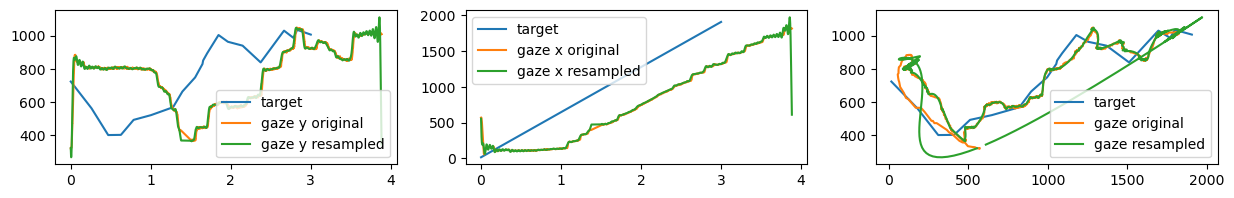

In [31]:
# plot original and resampled data
trial = 4.0
# filter x and y position by trial
path_y = y_pos_path.loc[path_data['trial_order'] == int(trial), :].values[0]
path_x = x_pos_path.loc[path_data['trial'] == int(trial), :].values[0]

gaze_y = data[data.trial == trial].y_pos
gaze_x = data[data.trial == trial].x_pos

gaze_y_res = resampled_data[resampled_data.trial == trial].y_pos
gaze_x_res = resampled_data[resampled_data.trial == trial].x_pos

# define a timeline for the path (3 seconds, 360 samlpes)
time_path = np.linspace(0, 3, 360)

# timeline for gaze
time_line_zeroed = data[data.trial == trial]['sample'] - data[data.trial == trial]['sample'].iloc[0]
# and divide by 1000 to make it seconds
time_target = time_line_zeroed/1000

# plot
fig, axs = plt.subplots(1,3, figsize = (15,2))

axs[0].plot(time_path, path_y, label = 'target')
axs[0].plot(time_target, gaze_y, label = 'gaze y original')
axs[0].plot(time_target, gaze_y_res, label = 'gaze y resampled')
axs[0].legend()

axs[1].plot(time_path, path_x, label = 'target')
axs[1].plot(time_target, gaze_x, label = 'gaze x original')
axs[1].plot(time_target, gaze_x_res, label ='gaze x resampled')
axs[1].legend()

axs[2].plot(path_x, path_y, label = 'target')
axs[2].plot(gaze_x, gaze_y, label = 'gaze original')
axs[2].plot(gaze_x_res, gaze_y_res, label = 'gaze resampled')
axs[2].legend();

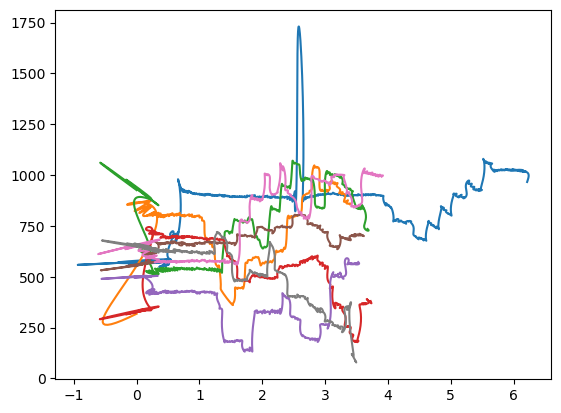

In [41]:
#plot resampled data

# visualize the x position over time for some selected trials
trials_to_plot = [1.0, 4.0, 8.0, 10.0, 11.0, 13.0, 14.0, 15.0]

for trial in trials_to_plot:
    # make sure each trial starts at 0
    time_line_zeroed = resampled_data[resampled_data.trial == trial]['sample'] - resampled_data[resampled_data.trial == trial]['sample'].iloc[0]
    # and divide by 1000 to make it seconds
    time_line_secs = time_line_zeroed/1000

    y_pos = resampled_data[resampled_data.trial == trial].y_pos
    plt.plot(time_line_secs[:-500], y_pos[:-500]) 

# remodnav with resampled data

In [15]:
resampled_data.to_csv("resampled_toni0001.csv", index=False)

In [55]:
df_resampled = pd.read_csv('resampled_toni0001.csv')
df_resampled = df_resampled[['x_pos', 'y_pos']]
df_resampled.to_csv('resampled_toni0001_xypositions.tsv', sep='\t', header=None, encoding=None, index=False)

#remodnav
#WARNING:Computed velocity exceeds threshold. Inappropriate filter setup?

## trial 15 events resampled

In [29]:
trial_15_resamp = resampled_data[resampled_data["trial"] == 15.0]

In [17]:
trial_15_resamp.to_csv("trial_15_resamp.csv", index=False)

In [18]:
df_trial15_resamp = pd.read_csv('trial_15_resamp.csv')
df_trial15_resamp = df_trial15_resamp[['x_pos', 'y_pos']]
df_trial15_resamp.to_csv('trial_15_resamp_xypositions.tsv', sep='\t', header=None, encoding=None, index=False)

## trial 30 events resampled

In [28]:
trial_30_resamp = resampled_data[resampled_data["trial"] == 30.0]

In [25]:
trial_30_resamp.to_csv("trial_30_resamp.csv", index=False)

In [26]:
df_trial30_resamp = pd.read_csv('trial_30_resamp.csv')
df_trial30_resamp = df_trial30_resamp[['x_pos', 'y_pos']]
df_trial30_resamp.to_csv('trial_30_resamp_xypositions.tsv', sep='\t', header=None, encoding=None, index=False)

# Find the Pixel to Degree Conversion

In [46]:
# for eye movement detection:
import math
screen_width = 28 # in cm
screen_res = 1920 # in pixel
viewing_distance = 57 # in cm (double-check in lab)

px2deg = np.degrees(math.atan2(.5 * screen_width, viewing_distance)) / (.5 * screen_res)
print(px2deg)

0.014374463954186843
